In [78]:
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [79]:
df = pd.read_csv('combined_data.csv', delimiter=',')

In [80]:
df.head()

,Unnamed: 0,LYB UN Equity Twitter Sentiment Daily Average,AXP UN Equity Twitter Sentiment Daily Average,VZ UN Equity Twitter Sentiment Daily Average,AVGO UW Equity Twitter Sentiment Daily Average,BA UN Equity Twitter Sentiment Daily Average,CAT UN Equity Twitter Sentiment Daily Average,JPM UN Equity Twitter Sentiment Daily Average,CVX UN Equity Twitter Sentiment Daily Average,KO UN Equity Twitter Sentiment Daily Average,...,JPM,KO,LYB,NVDA,SPY,TSLA,VZ,gdp,cpi,unemployment_rate
0,2019-05-13,0.0000,-0.0498,-0.0149,0.0325,-0.0566,-0.1278,0.0982,0.0557,-0.0074,...,-0.027198,-0.002905,-0.033390,-0.061427,-0.025130,-0.052229,-0.002811,3.4,1.8,3.6
1,2019-05-14,-0.0384,0.0000,-0.0182,0.1987,-0.0543,-0.1077,-0.0246,0.0803,0.0194,...,0.007949,0.013319,0.007760,0.022657,0.009043,0.023347,-0.003524,3.4,1.8,3.6
2,2019-05-15,0.0521,-0.0077,0.0029,0.0708,-0.0243,-0.0749,0.0260,0.0298,0.1013,...,-0.003807,0.010064,0.002732,-0.015181,0.005857,-0.001550,0.004598,3.4,1.8,3.6
3,2019-05-16,0.1392,0.0022,0.0120,-0.0347,-0.0183,-0.0354,-0.1119,0.0755,-0.0033,...,0.012830,0.008134,0.013128,0.003822,0.009261,-0.015607,0.010033,3.4,1.8,3.6
4,2019-05-17,0.0127,0.0165,-0.0009,0.0284,-0.0081,-0.0803,-0.1576,0.0878,0.0161,...,-0.004851,-0.007665,-0.020171,-0.022848,-0.006465,-0.075767,0.012374,3.4,1.8,3.6


In [144]:
df['ABBV Twitter Sentiment Daily Average'] = df['ABBV UN Equity Twitter Sentiment Daily Average']
df['AVGO Twitter Sentiment Daily Average'] = df['AVGO UW Equity Twitter Sentiment Daily Average']
df['AXP Twitter Sentiment Daily Average'] = df['AXP UN Equity Twitter Sentiment Daily Average']
df['BA Twitter Sentiment Daily Average'] = df['BA UN Equity Twitter Sentiment Daily Average']
df['CAT Twitter Sentiment Daily Average'] = df['CAT UN Equity Twitter Sentiment Daily Average']
df['CMG Twitter Sentiment Daily Average'] = df['CMG US Equity Twitter Sentiment Daily Average']
df['CVX Twitter Sentiment Daily Average'] = df['CVX UN Equity Twitter Sentiment Daily Average']
df['JPM Twitter Sentiment Daily Average'] = df['JPM UN Equity Twitter Sentiment Daily Average']
df['KO Twitter Sentiment Daily Average'] = df['KO UN Equity Twitter Sentiment Daily Average']
df['LYB Twitter Sentiment Daily Average'] = df['LYB UN Equity Twitter Sentiment Daily Average']
df['NVDA Twitter Sentiment Daily Average'] = df['NVDA US Equity Twitter Sentiment Daily Average']
df['VZ Twitter Sentiment Daily Average'] = df['VZ UN Equity Twitter Sentiment Daily Average']
df['TSLA Twitter Sentiment Daily Average'] = df['TSLA US Equity Twitter Sentiment Daily Average']

In [82]:
df.head()

,Unnamed: 0,LYB UN Equity Twitter Sentiment Daily Average,AXP UN Equity Twitter Sentiment Daily Average,VZ UN Equity Twitter Sentiment Daily Average,AVGO UW Equity Twitter Sentiment Daily Average,BA UN Equity Twitter Sentiment Daily Average,CAT UN Equity Twitter Sentiment Daily Average,JPM UN Equity Twitter Sentiment Daily Average,CVX UN Equity Twitter Sentiment Daily Average,KO UN Equity Twitter Sentiment Daily Average,...,AXP Twitter Sentiment Daily Average,BA Twitter Sentiment Daily Average,CAT Twitter Sentiment Daily Average,CMG Twitter Sentiment Daily Average,CVX Twitter Sentiment Daily Average,JPM Twitter Sentiment Daily Average,KO Twitter Sentiment Daily Average,LYB Twitter Sentiment Daily Average,NVDA Twitter Sentiment Daily Average,VZ Twitter Sentiment Daily Average
0,2019-05-13,0.0000,-0.0498,-0.0149,0.0325,-0.0566,-0.1278,0.0982,0.0557,-0.0074,...,-0.0498,-0.0566,-0.1278,-0.0144,0.0557,0.0982,-0.0074,0.0000,-0.0087,-0.0149
1,2019-05-14,-0.0384,0.0000,-0.0182,0.1987,-0.0543,-0.1077,-0.0246,0.0803,0.0194,...,0.0000,-0.0543,-0.1077,-0.0233,0.0803,-0.0246,0.0194,-0.0384,-0.0255,-0.0182
2,2019-05-15,0.0521,-0.0077,0.0029,0.0708,-0.0243,-0.0749,0.0260,0.0298,0.1013,...,-0.0077,-0.0243,-0.0749,0.0422,0.0298,0.0260,0.1013,0.0521,-0.0151,0.0029
3,2019-05-16,0.1392,0.0022,0.0120,-0.0347,-0.0183,-0.0354,-0.1119,0.0755,-0.0033,...,0.0022,-0.0183,-0.0354,0.0524,0.0755,-0.1119,-0.0033,0.1392,-0.0124,0.0120
4,2019-05-17,0.0127,0.0165,-0.0009,0.0284,-0.0081,-0.0803,-0.1576,0.0878,0.0161,...,0.0165,-0.0081,-0.0803,0.0642,0.0878,-0.1576,0.0161,0.0127,-0.0627,-0.0009


# LYB

In [83]:
X_LYB = df[['SPY', 'LYB UN Equity Twitter Sentiment Daily Average', 'gdp', 'cpi', 'unemployment_rate']]
y_LYB = df['LYB'] 

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X_LYB, y_LYB, test_size=0.2, random_state=42)

In [141]:
ridge_model = Ridge(alpha=1.0)  # El parámetro alpha controla la complejidad del modelo (mayor alpha, mayor regularización)
ridge_model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression MSE: {mse_ridge}")
print(f"Ridge Regression R^2: {r2_ridge}")

Ridge Regression MSE: 0.00014250812575735672
Ridge Regression R^2: -0.03764906646845567


In [143]:

coeficientes = ridge_model.coef_

print("Coeficientes del modelo Ridge:", coeficientes)

intercepto = ridge_model.intercept_
print("Intercepto del modelo Ridge:", intercepto)


Coeficientes del modelo Ridge: [ 1.31543981e-05 -2.33493975e-04  9.83366558e-05  1.94573305e-02]
Intercepto del modelo Ridge: 0.000559569764662053


In [86]:
lasso_model = Lasso(alpha=0.1)  # El parámetro alpha también controla la regularización en Lasso
lasso_model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression MSE: {mse_lasso}")
print(f"Lasso Regression R^2: {r2_lasso}")

Lasso Regression MSE: 0.0006915035409507742
Lasso Regression R^2: -0.0003044333366104546


# AXP

In [87]:
X_AXP = df[['SPY', 'AXP UN Equity Twitter Sentiment Daily Average', 'gdp', 'cpi', 'unemployment_rate']]
y_AXP = df['AXP'] 

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X_AXP, y_AXP, test_size=0.2, random_state=42)

In [89]:
ridge_model = Ridge(alpha=1.0)  # El parámetro alpha controla la complejidad del modelo (mayor alpha, mayor regularización)
ridge_model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression MSE: {mse_ridge}")
print(f"Ridge Regression R^2: {r2_ridge}")

Ridge Regression MSE: 0.0005982171606709729
Ridge Regression R^2: 0.146482365072774


In [90]:
lasso_model = Lasso(alpha=0.1)  # El parámetro alpha también controla la regularización en Lasso
lasso_model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression MSE: {mse_lasso}")
print(f"Lasso Regression R^2: {r2_lasso}")

Lasso Regression MSE: 0.0007035611531352082
Lasso Regression R^2: -0.003819166232374993


# VZ

In [91]:
X_VZ = df[['SPY', 'VZ UN Equity Twitter Sentiment Daily Average', 'gdp', 'cpi', 'unemployment_rate']]
y_VZ = df['VZ'] 

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X_VZ, y_VZ, test_size=0.2, random_state=42)

In [93]:
ridge_model = Ridge(alpha=1.0)  # El parámetro alpha controla la complejidad del modelo (mayor alpha, mayor regularización)
ridge_model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression MSE: {mse_ridge}")
print(f"Ridge Regression R^2: {r2_ridge}")

Ridge Regression MSE: 0.00013271020032511164
Ridge Regression R^2: 0.03369288771180845


In [94]:
lasso_model = Lasso(alpha=0.1)  # El parámetro alpha también controla la regularización en Lasso
lasso_model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression MSE: {mse_lasso}")
print(f"Lasso Regression R^2: {r2_lasso}")

Lasso Regression MSE: 0.00013748908226433835
Lasso Regression R^2: -0.0011037412989804984


# AVGO

In [95]:
X_AVGO = df[['SPY', 'AVGO UW Equity Twitter Sentiment Daily Average', 'gdp', 'cpi', 'unemployment_rate']]
y_AVGO = df['AVGO'] 

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X_AVGO, y_AVGO, test_size=0.2, random_state=42)

In [97]:
ridge_model = Ridge(alpha=1.0)  # El parámetro alpha controla la complejidad del modelo (mayor alpha, mayor regularización)
ridge_model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression MSE: {mse_ridge}")
print(f"Ridge Regression R^2: {r2_ridge}")

Ridge Regression MSE: 0.0004629932737517273
Ridge Regression R^2: 0.18462806484591465


In [98]:
lasso_model = Lasso(alpha=0.1)  # El parámetro alpha también controla la regularización en Lasso
lasso_model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression MSE: {mse_lasso}")
print(f"Lasso Regression R^2: {r2_lasso}")

Lasso Regression MSE: 0.0005700127813130187
Lasso Regression R^2: -0.0038427141621613092


# BA

In [99]:
X_BA = df[['SPY', 'BA UN Equity Twitter Sentiment Daily Average', 'gdp', 'cpi', 'unemployment_rate']]
y_BA = df['BA'] 

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X_BA, y_BA, test_size=0.2, random_state=42)

In [101]:
ridge_model = Ridge(alpha=1.0)  # El parámetro alpha controla la complejidad del modelo (mayor alpha, mayor regularización)
ridge_model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression MSE: {mse_ridge}")
print(f"Ridge Regression R^2: {r2_ridge}")

Ridge Regression MSE: 0.0010571814734973693
Ridge Regression R^2: 0.11224089679341276


In [102]:
lasso_model = Lasso(alpha=0.1)  # El parámetro alpha también controla la regularización en Lasso
lasso_model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression MSE: {mse_lasso}")
print(f"Lasso Regression R^2: {r2_lasso}")

Lasso Regression MSE: 0.0011946954950231069
Lasso Regression R^2: -0.0032353270039617854


# ABBV

In [103]:
X_ABBV = df[['SPY', 'ABBV UN Equity Twitter Sentiment Daily Average', 'gdp', 'cpi', 'unemployment_rate']]
y_ABBV = df['ABBV'] 

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X_ABBV, y_ABBV, test_size=0.2, random_state=42)

In [105]:
ridge_model = Ridge(alpha=1.0)  # El parámetro alpha controla la complejidad del modelo (mayor alpha, mayor regularización)
ridge_model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression MSE: {mse_ridge}")
print(f"Ridge Regression R^2: {r2_ridge}")

Ridge Regression MSE: 0.0001996300891442153
Ridge Regression R^2: 0.08566351905792946


In [106]:
lasso_model = Lasso(alpha=0.1)  # El parámetro alpha también controla la regularización en Lasso
lasso_model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression MSE: {mse_lasso}")
print(f"Lasso Regression R^2: {r2_lasso}")

Lasso Regression MSE: 0.00021842440870211745
Lasso Regression R^2: -0.00041735221723571136


# CAT

In [107]:
X_CAT = df[['SPY', 'CAT UN Equity Twitter Sentiment Daily Average', 'gdp', 'cpi', 'unemployment_rate']]
y_CAT = df['CAT'] 

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X_CAT, y_CAT, test_size=0.2, random_state=42)

In [109]:
ridge_model = Ridge(alpha=1.0)  # El parámetro alpha controla la complejidad del modelo (mayor alpha, mayor regularización)
ridge_model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression MSE: {mse_ridge}")
print(f"Ridge Regression R^2: {r2_ridge}")

Ridge Regression MSE: 0.00043365523318725983
Ridge Regression R^2: 0.11407630843012007


In [110]:
lasso_model = Lasso(alpha=0.1)  # El parámetro alpha también controla la regularización en Lasso
lasso_model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression MSE: {mse_lasso}")
print(f"Lasso Regression R^2: {r2_lasso}")

Lasso Regression MSE: 0.0004895513899205651
Lasso Regression R^2: -0.00011516379951381772


# JPM

In [111]:
X_JPM = df[['SPY', 'JPM UN Equity Twitter Sentiment Daily Average', 'gdp', 'cpi', 'unemployment_rate']]
y_JPM = df['JPM'] 

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X_JPM, y_JPM, test_size=0.2, random_state=42)

In [113]:
ridge_model = Ridge(alpha=1.0)  # El parámetro alpha controla la complejidad del modelo (mayor alpha, mayor regularización)
ridge_model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression MSE: {mse_ridge}")
print(f"Ridge Regression R^2: {r2_ridge}")

Ridge Regression MSE: 0.0003119774893686293
Ridge Regression R^2: 0.1697145342497265


In [114]:
lasso_model = Lasso(alpha=0.1)  # El parámetro alpha también controla la regularización en Lasso
lasso_model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression MSE: {mse_lasso}")
print(f"Lasso Regression R^2: {r2_lasso}")

Lasso Regression MSE: 0.00037651975024296207
Lasso Regression R^2: -0.0020558753367851956


# CVX

In [115]:
X_CVX = df[['SPY', 'CVX UN Equity Twitter Sentiment Daily Average', 'gdp', 'cpi', 'unemployment_rate']]
y_CVX = df['CVX'] 

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X_CVX, y_JPM, test_size=0.2, random_state=42)

In [117]:
ridge_model = Ridge(alpha=1.0)  # El parámetro alpha controla la complejidad del modelo (mayor alpha, mayor regularización)
ridge_model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression MSE: {mse_ridge}")
print(f"Ridge Regression R^2: {r2_ridge}")

Ridge Regression MSE: 0.00031324798995490733
Ridge Regression R^2: 0.166333270514485


In [118]:
lasso_model = Lasso(alpha=0.1)  # El parámetro alpha también controla la regularización en Lasso
lasso_model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression MSE: {mse_lasso}")
print(f"Lasso Regression R^2: {r2_lasso}")

Lasso Regression MSE: 0.00037651975024296207
Lasso Regression R^2: -0.0020558753367851956


# CMG

In [119]:
X_CMG = df[['SPY', 'CMG US Equity Twitter Sentiment Daily Average', 'gdp', 'cpi', 'unemployment_rate']]
y_CMG = df['CMG'] 

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X_CMG, y_JPM, test_size=0.2, random_state=42)

In [121]:
ridge_model = Ridge(alpha=1.0)  # El parámetro alpha controla la complejidad del modelo (mayor alpha, mayor regularización)
ridge_model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression MSE: {mse_ridge}")
print(f"Ridge Regression R^2: {r2_ridge}")

Ridge Regression MSE: 0.00031184967368770507
Ridge Regression R^2: 0.1700546982223936


In [122]:
lasso_model = Lasso(alpha=0.1)  # El parámetro alpha también controla la regularización en Lasso
lasso_model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression MSE: {mse_lasso}")
print(f"Lasso Regression R^2: {r2_lasso}")

Lasso Regression MSE: 0.00037651975024296207
Lasso Regression R^2: -0.0020558753367851956


# TSLA

In [123]:
X_TSLA = df[['TSLA', 'TSLA US Equity Twitter Sentiment Daily Average', 'gdp', 'cpi', 'unemployment_rate']]
y_TSLA = df['TSLA'] 

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X_TSLA, y_TSLA, test_size=0.2, random_state=42)

In [125]:
ridge_model = Ridge(alpha=1.0)  # El parámetro alpha controla la complejidad del modelo (mayor alpha, mayor regularización)
ridge_model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression MSE: {mse_ridge}")
print(f"Ridge Regression R^2: {r2_ridge}")

Ridge Regression MSE: 0.0002199176601238421
Ridge Regression R^2: 0.8614880891453109


In [126]:
lasso_model = Lasso(alpha=0.1)  # El parámetro alpha también controla la regularización en Lasso
lasso_model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression MSE: {mse_lasso}")
print(f"Lasso Regression R^2: {r2_lasso}")

Lasso Regression MSE: 0.0015877298811266057
Lasso Regression R^2: -8.365094878337587e-06


# NVDA

In [127]:
X_NVDA = df[['NVDA', 'NVDA US Equity Twitter Sentiment Daily Average', 'gdp', 'cpi', 'unemployment_rate']]
y_NVDA = df['NVDA'] 

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X_NVDA, y_NVDA, test_size=0.2, random_state=42)

In [129]:
ridge_model = Ridge(alpha=1.0)  # El parámetro alpha controla la complejidad del modelo (mayor alpha, mayor regularización)
ridge_model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression MSE: {mse_ridge}")
print(f"Ridge Regression R^2: {r2_ridge}")

Ridge Regression MSE: 0.00023847477770885667
Ridge Regression R^2: 0.7657933538025483


In [130]:
lasso_model = Lasso(alpha=0.1)  # El parámetro alpha también controla la regularización en Lasso
lasso_model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression MSE: {mse_lasso}")
print(f"Lasso Regression R^2: {r2_lasso}")

Lasso Regression MSE: 0.0010249235459869257
Lasso Regression R^2: -0.006579851423350602


In [138]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Suponiendo que df es tu DataFrame con todas las variables incluyendo los retornos y sentimientos

tickers = ['ABBV', 'AVGO', 'AXP', 'BA', 'CMG', 'CAT', 'CVX', 'JPM', 'KO', 'LYB', 'NVDA', 'TSLA', 'VZ']

# Crear un DataFrame vacío para almacenar los resultados
results = pd.DataFrame()

# Ajustar los modelos y almacenar los resultados
for ticker in tickers:
    X = df[['gdp', 'cpi', 'unemployment_rate', f'{ticker} Twitter Sentiment Daily Average']]
    y = df[ticker]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    ridge_model = Ridge(alpha=1.0)
    ridge_model.fit(X_train, y_train)
    y_pred_ridge = ridge_model.predict(X_test)
    
    lasso_model = Lasso(alpha=0.1)
    lasso_model.fit(X_train, y_train)
    y_pred_lasso = lasso_model.predict(X_test)
    
    # Calcular métricas
    mse_ridge = mean_squared_error(y_test, y_pred_ridge)
    r2_ridge = r2_score(y_test, y_pred_ridge)
    mse_lasso = mean_squared_error(y_test, y_pred_lasso)
    r2_lasso = r2_score(y_test, y_pred_lasso)
    
    # Preparar un DataFrame temporal con los resultados
    temp_results = pd.DataFrame({
        'Ticker': [ticker],
        'MSE Ridge': [mse_ridge],
        'R2 Ridge': [r2_ridge],
        'MSE Lasso': [mse_lasso],
        'R2 Lasso': [r2_lasso]
    })

    # Concatenar el DataFrame temporal con el DataFrame de resultados
    results = pd.concat([results, temp_results], ignore_index=True)

# Muestra los resultados
print(results)


   Ticker  MSE Ridge  R2 Ridge  MSE Lasso  R2 Lasso
0    ABBV   0.000218  0.000695   0.000218 -0.000417
1    AVGO   0.000561  0.011325   0.000570 -0.003843
2     AXP   0.000705 -0.006543   0.000704 -0.003819
3      BA   0.001187  0.003359   0.001195 -0.003235
4     CMG   0.000420  0.007452   0.000424 -0.001721
5     CAT   0.000489  0.000171   0.000490 -0.000115
6     CVX   0.000578 -0.032583   0.000560 -0.001293
7     JPM   0.000379 -0.007818   0.000377 -0.002056
8      KO   0.000191 -0.014848   0.000188 -0.000265
9     LYB   0.000688  0.004356   0.000692 -0.000304
10   NVDA   0.001021 -0.002690   0.001025 -0.006580
11   TSLA   0.001530  0.036422   0.001588 -0.000008
12     VZ   0.000143 -0.037649   0.000137 -0.001104


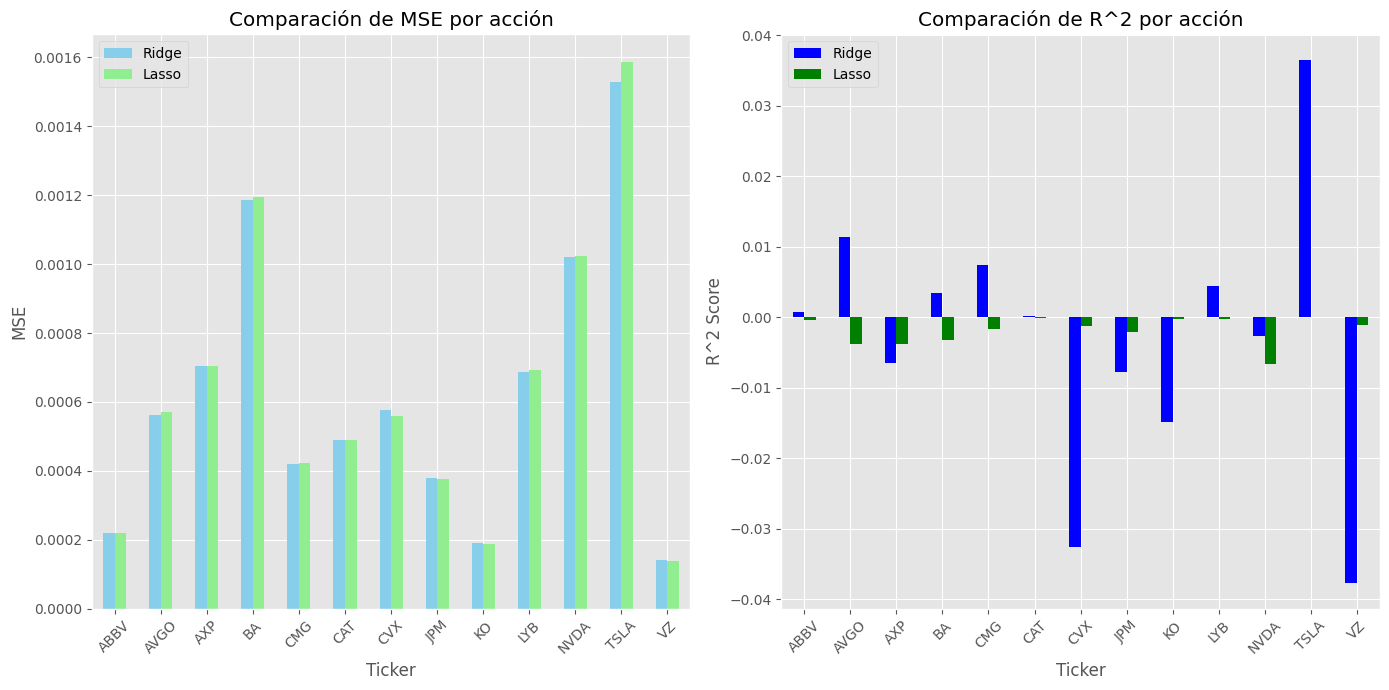

In [139]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Suponiendo que 'results' es tu DataFrame que ya contiene los resultados

# Establece un estilo de gráfico
plt.style.use('ggplot')

# Crea un gráfico de barras para MSE
plt.figure(figsize=(14, 7))
ax1 = plt.subplot(121)
results[['MSE Ridge', 'MSE Lasso']].plot(kind='bar', ax=ax1, color=['skyblue', 'lightgreen'])
plt.title('Comparación de MSE por acción')
plt.ylabel('MSE')
plt.xlabel('Ticker')
plt.xticks(np.arange(len(results['Ticker'])), results['Ticker'], rotation=45)
plt.legend(['Ridge', 'Lasso'])

# Crea un gráfico de barras para R^2
ax2 = plt.subplot(122)
results[['R2 Ridge', 'R2 Lasso']].plot(kind='bar', ax=ax2, color=['blue', 'green'])
plt.title('Comparación de R^2 por acción')
plt.ylabel('R^2 Score')
plt.xlabel('Ticker')
plt.xticks(np.arange(len(results['Ticker'])), results['Ticker'], rotation=45)
plt.legend(['Ridge', 'Lasso'])

plt.tight_layout()
plt.show()
